In [37]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 20 09:47:22 2020

@author: luc

"""
# Exploration des données du Projet

# Partie: 1 - Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal    import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [38]:
# Partie : 2 - Importation des données

Data_training = pd.read_csv("https://raw.githubusercontent.com/oreilly-mlsec/book-resources/599669c7124dffb65ea7f6e0b7626df32496b1d6/chapter3/datasets/cpu-utilization/cpu-full-a.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)


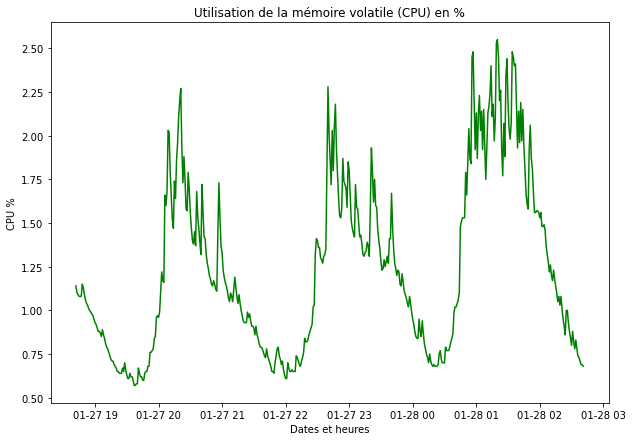

In [39]:
# Partie : 3 -  Visualisation des données
plt.figure(figsize=(10,7)) 
plt.plot(Data_training,color = 'green')
plt.ylabel('CPU %')
plt.xlabel('Dates et heures')
plt.title('Utilisation de la mémoire volatile (CPU) en %')
plt.show()

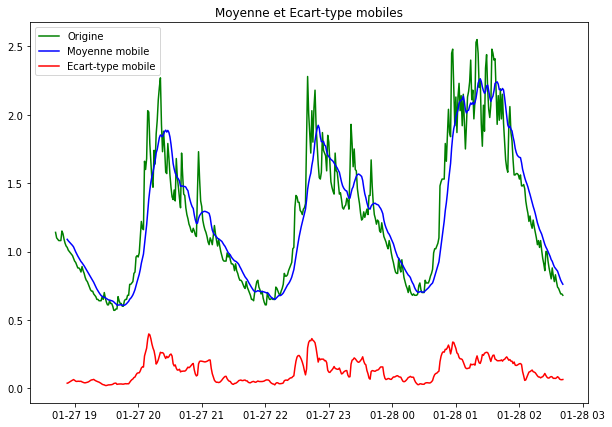

In [40]:
# Partie : 4 - Moyennne et Ecartype Mobiles de la series

rolling_mean = Data_training.rolling(window = 12).mean()
rolling_std = Data_training.rolling(window = 12).std()
plt.figure(figsize=(10,7)) 
plt.plot(Data_training, color = 'green', label = 'Origine')
plt.plot(rolling_mean, color = 'blue', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'red', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

<Figure size 432x288 with 0 Axes>

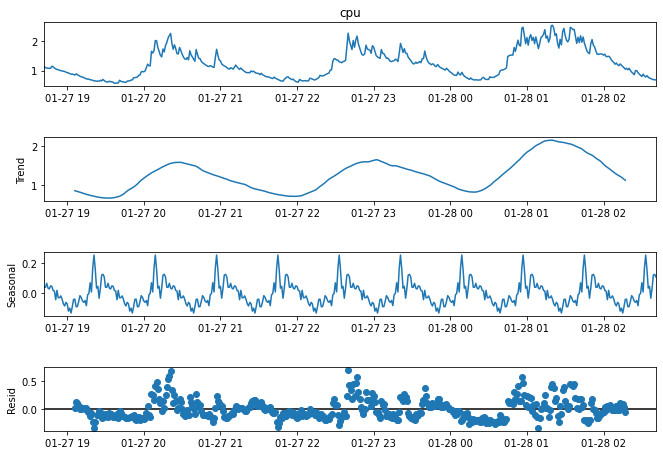

In [41]:
# Partie : 5 - Décomposition de la serie

decomposition=seasonal_decompose(Data_training,model='additive',period=48)

fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(10,7)


In [42]:
# Partie : 6 - Test Dickey–Fuller :

result = adfuller(Data_training)
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -3.12536766221175
p-value : 0.02473194235736432
Valeurs Critiques :
	1%: -3.4446148284445153
	5%: -2.8678299626609314
	10%: -2.5701203107928157


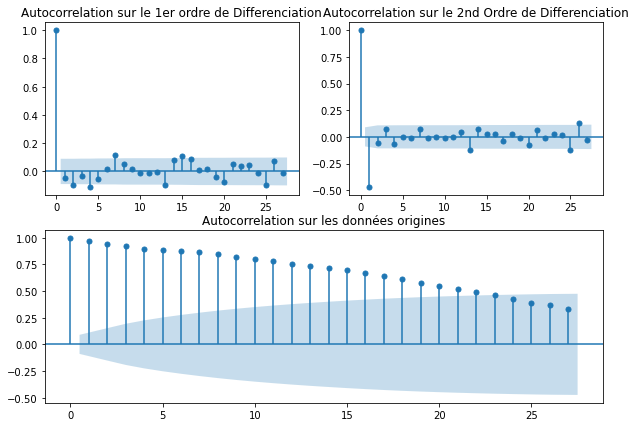

In [43]:
# Partie : 7 - Etude des autoccorrelations

fig=plt.figure(figsize=(10,7)) 
ax1 = fig.add_subplot(212)
fig=plot_acf(Data_training, ax=ax1,title="Autocorrelation sur les données origines") 
ax2 = fig.add_subplot(221)
fig=plot_acf(Data_training.diff().dropna(), ax=ax2,title="Autocorrelation sur le 1er ordre de Differenciation")
ax3 = fig.add_subplot(222)
fig=plot_acf(Data_training.diff().diff().dropna(), ax=ax3,title="Autocorrelation sur le 2nd Ordre de Differenciation")
plt.show()

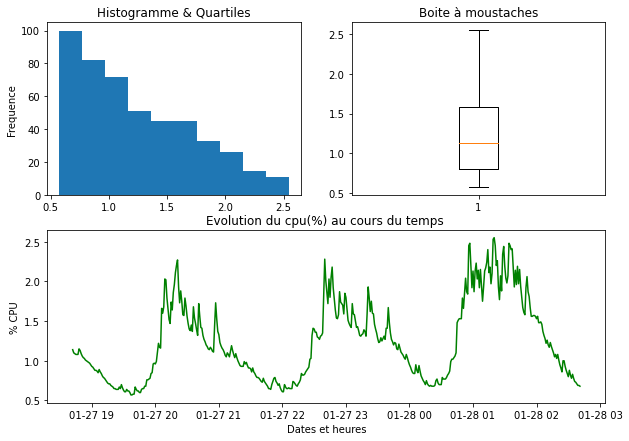

In [44]:
# Partie : 8 - Traitement des valeurs extremes

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.hist(Data_training)
plt.title("Histogramme & Quartiles")
plt.ylabel("Frequence")
plt.subplot(2,2,2)
plt.boxplot(Data_training)
plt.title("Boite à moustaches")
plt.subplot(2,1,2)
plt.plot(Data_training,color = 'green', label = 'Evolution du cpu(%)')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.title('Evolution du cpu(%) au cours du temps ')
plt.show()